In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from copy import deepcopy
from build_solver import build_erg_time_opt_solver
import pickle as pkl

In [2]:
import sys 
sys.path.append('../..')
from time_opt_erg_lib.fourier_utils import BasisFunc, get_phik, get_ck, recon_from_fourier
from time_opt_erg_lib.ergodic_metric import ErgodicMetric
from bimodal_distr import TargetDistribution


In [3]:
target_distr    = TargetDistribution()
basis           = BasisFunc(n_basis=[20])
phik = get_phik(target_distr.evals, basis)
erg_metric = ErgodicMetric(basis)

<StemContainer object of 3 artists>

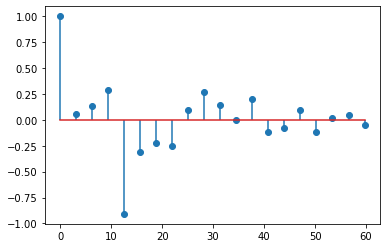

In [4]:
plt.stem(basis.k_list, phik)

In [5]:
# bnds = [0.001, 0.1, 0.6]

# for _bnd in bnds:
#     idx = np.abs(phik)>_bnd
#     phi_recon = recon_from_fourier(phik[idx], basis, basis.k_list[idx], target_distr.evals[1])
#     plt.show()
#     plt.plot(target_distr.evals[1], phi_recon)

In [6]:
plt.hist(np.array(sol['x'][:,0]), bins=5)

NameError: name 'sol' is not defined

(array([ 3.,  7., 14., 32., 59., 60., 39., 25.,  8.,  3.]),
 array([141.58899909, 147.27219165, 152.95538422, 158.63857679,
        164.32176936, 170.00496193, 175.68815449, 181.37134706,
        187.05453963, 192.7377322 , 198.42092477]),
 <BarContainer object of 10 artists>)

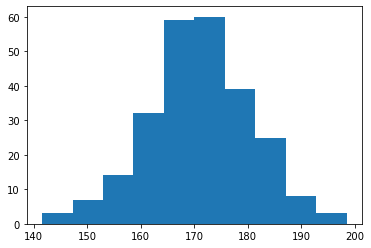

In [7]:
x = np.random.normal(170, 10, 250)

plt.hist(x, bins=10)

done in  6176  iterations
4.0746937


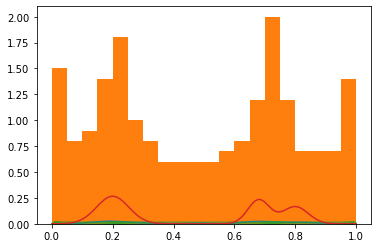

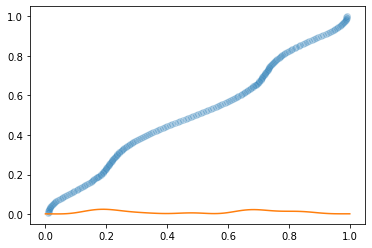

done in  6437  iterations
5.227067


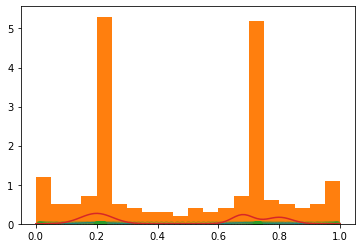

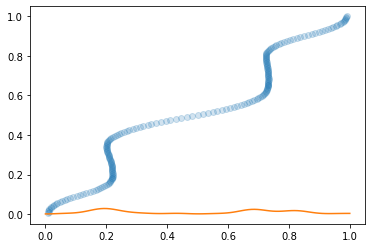

done in  7701  iterations
22.29092


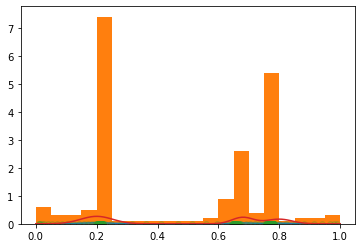

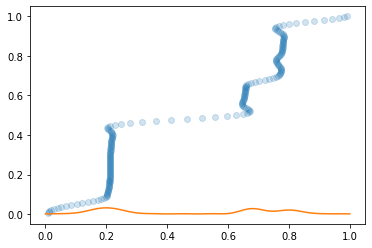

In [9]:
init_tfs = [10., 10., 30.]
bnds = [0.2, 0.1, 0.01]

for _tf, _bnd in zip(init_tfs, bnds):

    args = {
        'N' : 200, 
        'x0' : np.array([0.01, 0.]),
        'xf' : np.array([0.99, 0.]),
        'erg_ub' : _bnd,
    }

    x = np.linspace(args['x0'], args['xf'], args['N'], endpoint=True)
    u = np.zeros((args['N'], 1))
    init_sol = {'x': x, 'u' : u, 'tf': np.array(_tf)}

    solver = build_erg_time_opt_solver(init_sol, args)
    solver.solve(args=args, max_iter=20000, eps=1e-8)
    sol = solver.get_solution()
    print(sol['tf'])

    ck = get_ck(sol['x'][:,0], basis, sol['tf'], dt=float(sol['tf']/args['N']))

    idx = np.abs(phik)>_bnd
    phi_recon = recon_from_fourier(phik[idx], basis, basis.k_list[idx], target_distr.evals[1], normalize=True)
    
    # ck_recon = recon_from_fourier(ck, basis, basis.k_list, target_distr.evals[1])
    plt.figure(1)
    plt.plot(target_distr.evals[1], phi_recon)
    plt.hist(np.array(sol['x'][:,0]), bins=20, range=(0,1),density=True)

    _x = sol['x']
    plt.plot(_x[:,0], np.zeros_like(_x[:,0]), 'o', alpha=0.2)
    # plt.legend()
    plt.plot(target_distr.domain[0], target_distr.evals[0])

    plt.figure(2)
    plt.plot(_x[:,0], np.cumsum(np.ones_like(_x[:,0]))/200, 'o', alpha=0.2)
    plt.plot(target_distr.evals[1], phi_recon)

    plt.show()


NameError: name 'log' is not defined

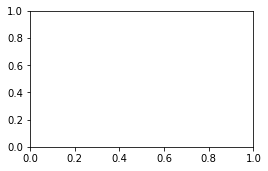

In [9]:
plt.rcParams["font.family"] = "freeserif"

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig, ax1 = plt.subplots(figsize=(4,2.5))


ax1.plot(log['erg_ub'], log['time'], color=colors[0])
# plt.plot(log['time'], ctrl_sat)
ax1.set_xlabel('Ergodicity Upper Bound', fontname='freeserif')
ax1.set_ylabel('Optimized Time (s)', color=colors[0], fontname='freeserif', weight='bold')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(log['erg_ub'], ctrl_sat, color=colors[1], linestyle='-.')
ax2.set_ylabel('Time-Normalized Control Cost', color=colors[1], fontname='freeserif', weight='bold')
plt.tight_layout()
plt.savefig('opt-results.svg')
# plt.show()